# DDoS Attack Detection Using Machine Learning  

 Cyber-attacks are increasing rapidly there is Distributed Denial-of-Service Attack (DDoS). DDoS Attacks are strong and frequent attacks with a high success rate and the most significant risk to the Internet. The main effect of a DDoS attack is reduced service availability.To protect network and information technology, we need to develop a Machine Learning model to detect malicious activities.This could enhance the overall efficiency of DDoS attack detection and minimize the harm of attacks on the network infrastructure. 
 *The steps demonstrated in this notebook are:
 1.Loading the data
 
 2.Familiarizing with data & EDA
 
 3.Preprocessing the data 
 
 4.Splitting the data
 
 5.Training the data
 
 6.Conclusion
 

In [ ]:
#importing required libraries
import pandas as pd  
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# 1.Loading Data:
To evaluate the efficiency of our proposed model,the CICDDoS2019 Dataset was used.It contains DDoS attacks and normal traffic. 

The CSV file contain 431372 instances and 77 input features.Benign is a normal class(represents zero),and others are 

attacks(represents one). 

In [2]:
data=pd.read_csv("cicddos2019_dataset_unbalance.csv" )
low_memory=False
data.head()

,Unnamed: 0,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Class
0,0,17,216631,6,0,2088,0,393,321,348.0,...,14,0.0,0.0,0,0,0.0,0.0,0,0,Attack
1,1,17,2,2,0,802,0,401,401,401.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Attack
2,2,17,48,2,0,766,0,383,383,383.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Attack
3,3,17,107319,4,0,1398,0,369,330,349.5,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Attack
4,4,17,107271,4,0,1438,0,389,330,359.5,...,8,0.0,0.0,0,0,0.0,0.0,0,0,Attack


# 2. Familiarizing with Data & EDA:

In this step, few dataframe methods are used to look into the data and its features.

In [3]:
mask = data.isnull().any(axis=1) # place of NaN and Infinty count
#drop data that with null values  
print("Before Drop null values", data.shape)
data =  data[~mask] 
print("After Drop null values", data.shape)

Before Drop null values (431371, 67)
After Drop null values (431371, 67)


In [4]:
data = data.drop('Unnamed: 0',axis=1)

In [5]:
data.shape

(431371, 66)

In [6]:
#Remove Duplicate
data.drop_duplicates()
data.shape

(431371, 66)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 431371 entries, 0 to 431370
Data columns (total 66 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Protocol                  431371 non-null  int64  
 1   Flow Duration             431371 non-null  int64  
 2   Total Fwd Packets         431371 non-null  int64  
 3   Total Backward Packets    431371 non-null  int64  
 4   Fwd Packets Length Total  431371 non-null  int64  
 5   Bwd Packets Length Total  431371 non-null  int64  
 6   Fwd Packet Length Max     431371 non-null  int64  
 7   Fwd Packet Length Min     431371 non-null  int64  
 8   Fwd Packet Length Mean    431371 non-null  float64
 9   Fwd Packet Length Std     431371 non-null  float64
 10  Bwd Packet Length Max     431371 non-null  int64  
 11  Bwd Packet Length Min     431371 non-null  int64  
 12  Bwd Packet Length Mean    431371 non-null  float64
 13  Bwd Packet Length Std     431371 non-null  f

In [8]:
# nunique value in columns
data['Protocol'].unique()

array([17,  6,  0], dtype=int64)

# 3.Preprocessing the data 

Is the process of transforming raw data into a form that may be used in machine learning.There are many preprocessing 

techniques such as  label encoder,  normalization, scaling, data balance and features selection  

# 3.1.Label Encoder

Is a data preprocessing technique used to convert categorical variables into numerical labels.

In [9]:
#Encoding Protocol
labelencoder = LabelEncoder()
data['Protocol'] = labelencoder.fit_transform(data['Protocol'])
data['Protocol'].unique()

array([2, 1, 0], dtype=int64)

In [10]:
#Encoding Class
#let Benign  = 0  and Bot =1 in label  
labelencoder = LabelEncoder()
data['Class'] = labelencoder.fit_transform(data['Class'])
data['Class'].unique()

array([0, 1])

# 3.2.Normalization
 Is a data preprocessing technique used to bring the values of different features or variables to a similar scale.Note that normalization should be applied to the training data 

In [11]:
col_for_not_nor = ['Fwd PSH Flags','SYN Flag Count', 
'RST Flag Count', 'Protocol','Class','ACK Flag Count', 'URG Flag Count', 'CWE Flag Count']

In [12]:
col_for_nor = [] 

for col in data.columns:
    if col not in col_for_not_nor:
         col_for_nor.append(col)
    else:
        continue 
col_for_nor       

['Flow Duration',
 'Total Fwd Packets',
 'Total Backward Packets',
 'Fwd Packets Length Total',
 'Bwd Packets Length Total',
 'Fwd Packet Length Max',
 'Fwd Packet Length Min',
 'Fwd Packet Length Mean',
 'Fwd Packet Length Std',
 'Bwd Packet Length Max',
 'Bwd Packet Length Min',
 'Bwd Packet Length Mean',
 'Bwd Packet Length Std',
 'Flow Bytes/s',
 'Flow Packets/s',
 'Flow IAT Mean',
 'Flow IAT Std',
 'Flow IAT Max',
 'Flow IAT Min',
 'Fwd IAT Total',
 'Fwd IAT Mean',
 'Fwd IAT Std',
 'Fwd IAT Max',
 'Fwd IAT Min',
 'Bwd IAT Total',
 'Bwd IAT Mean',
 'Bwd IAT Std',
 'Bwd IAT Max',
 'Bwd IAT Min',
 'Fwd Header Length',
 'Bwd Header Length',
 'Fwd Packets/s',
 'Bwd Packets/s',
 'Packet Length Min',
 'Packet Length Max',
 'Packet Length Mean',
 'Packet Length Std',
 'Packet Length Variance',
 'Down/Up Ratio',
 'Avg Packet Size',
 'Avg Fwd Segment Size',
 'Avg Bwd Segment Size',
 'Subflow Fwd Packets',
 'Subflow Fwd Bytes',
 'Subflow Bwd Packets',
 'Subflow Bwd Bytes',
 'Init Fwd Win Byt

In [13]:
#Drop class column 
inputs = data.drop('Class', axis='columns')

# 3.3.Scaling 

The MinMaxScaler scales the values of the selected columns to a range between 0 and 1.

In [14]:
#MinMax Scaler
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[col_for_nor] = scaler.fit_transform(data[col_for_nor])

# range from 0 to 1
data.head()

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Class
0,2,1.805269e-03,0.000058,0.0,0.000137,0.0,0.012235,0.150634,0.115412,0.015795,...,0.954428,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,2,8.333421e-09,0.000012,0.0,0.000053,0.0,0.012484,0.188175,0.132989,0.000000,...,0.954428,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,2,3.916708e-07,0.000012,0.0,0.000050,0.0,0.011924,0.179728,0.127019,0.000000,...,0.954428,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,2,8.943260e-04,0.000035,0.0,0.000092,0.0,0.011488,0.154857,0.115909,0.010136,...,0.954428,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,2,8.939260e-04,0.000035,0.0,0.000094,0.0,0.012111,0.154857,0.119226,0.015333,...,0.954428,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [15]:
#checks for null values and drop rows that contain null values.
mask = data.isnull().any(axis=1) 
#drop data that with null values  
print("Before Drop null values", data.shape)
data =  data[~mask] 
print("After Drop null values", data.shape)

Before Drop null values (431371, 66)
After Drop null values (431371, 66)


# 4. Splitting the Data:

The data is split into train & test sets, 70-30 split.



In [16]:
# Predictive Machine Learning
x= inputs
y = data['Class']

In [17]:
# Splitting the dataset into train and test sets: 70-30 split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=200)
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((301959, 65), (129412, 65), (301959,), (129412,))

In [18]:
print(y_train.value_counts())

0    233467
1     68492
Name: Class, dtype: int64


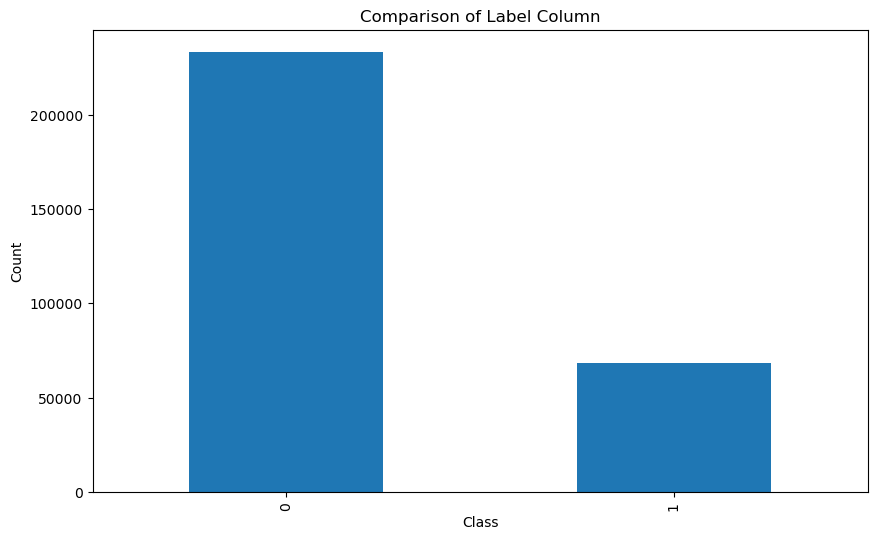

In [19]:
#generate a bar plot that visualizes the counts of each label in the y_train column(distribution of classes)
import pandas as pd
import matplotlib.pyplot as plt

# Count the occurrences of each label
label_counts = y_train.value_counts()

# Create a bar plot to visualize the label counts
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar')
plt.title('Comparison of Label Column')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# 3.4.Data Balance 

Within machine learning, it is preferable to have a well-balanced dataset. Under sampling techniques using Near Miss were used.

In [20]:
#Data Balance under-sampling using the NearMiss algorithm
from imblearn.under_sampling import NearMiss
from collections import Counter
nm = NearMiss()

X_train, y_train = nm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_train))

Resampled dataset shape Counter({0: 68492, 1: 68492})


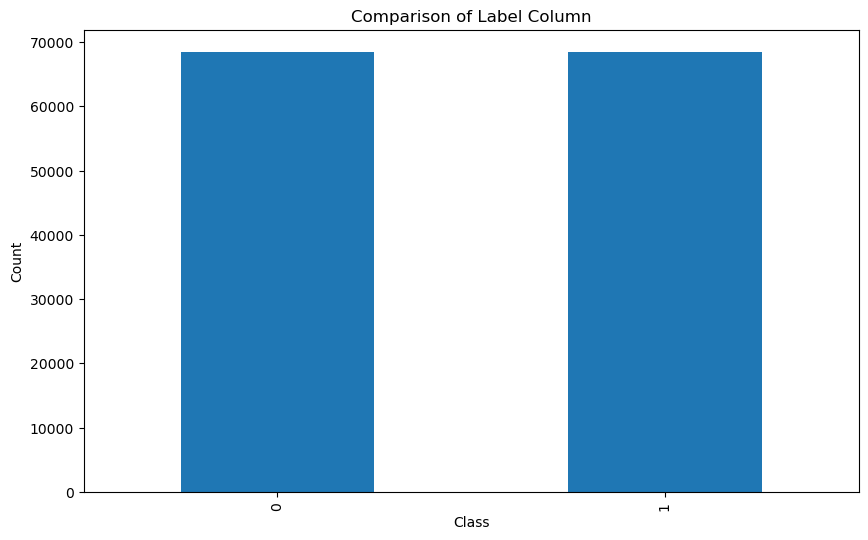

In [21]:
#create a bar plot to visualize the label counts
import pandas as pd
import matplotlib.pyplot as plt

# Count the occurrences of each label
label_counts = y_train.value_counts()

# Create a bar plot to visualize the label counts
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar')
plt.title('Comparison of Label Column')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# 5. Model Building & Training:

A method of data analysis that creates models using algorithms that learn from data, allowing computers to make correct predictions without being explicitly programmed. The most common categorization of machine learning algorithms is Supervised and Unsupervised. In this project supervised machine learning was used. Supervised machine learning is useful when the labels and features of the training set are known. 

 The supervised machine learning models considered to train the dataset in this notebook are:
 
 1.Random Forest
 
 2.Decision Tree
 
 3.Xgboost
 
 4.k-Nearest Neighbors
 
 5.Logistic Regression
 
 6.GaussianNB
 
 The metrics considered to evaluate the model performance are Accuracy , F1 score , Recal and Precision 

# 5.1.Random Forest classifier
Random Forest make predictions by combining multiple decision trees. Each tree is determined by the values of a random vector sampled randomly and with the same distribution. The output of the classifier is determined by the most voted class among all the trees in the model during the classification process.

In [24]:
#Random Forest classifier
#instantiate the model
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.ensemble import RandomForestClassifier
RFmodel = RandomForestClassifier(n_estimators=40,random_state=101,max_depth=15,criterion='entropy')
# fit the model
RFmodel = RFmodel.fit(X_train,y_train)
y_predec_RFmodel = RFmodel.predict(X_test)

# Calculate and print the accuracy score
accuracy_RFmodel = accuracy_score(y_test, y_predec_RFmodel )
print("Accuracy score:" ,accuracy_RFmodel )

# Calculate and print the f1 score
RFmodel_f1_score= f1_score(y_test,y_predec_RFmodel , average='weighted')
print("F1 score: ",RFmodel_f1_score)

# Calculate and print the Recall score
RFmodel_recall = recall_score(y_test,y_predec_RFmodel , average='weighted')
print("Recall score:" ,RFmodel_recall)

# Calculate and print the precision score
RFmodel_precision = precision_score(y_test,y_predec_RFmodel , average='weighted')
print("Precision score",RFmodel_precision)

Accuracy score: 0.913060612617068
F1 score:  0.9174620434278463
Recall score: 0.913060612617068
Precision score 0.9371217460773607


# 5.2.logistic regression classifier
Logistic regression measures the relationship between the predicted variable and at least one independent factor. Following that, a sigmoid function is used to convert the obtained probabilities to binary values. The Sigmoid Function is shown as an S-shaped curve that standardizes data between the range of 0 and 1 using a real-valued input. Using logistic regression, you may categorize data and identify the best classification factors. 

In [25]:
#logistic regression classifier
#instantiate the model
from sklearn.linear_model import LogisticRegression
# fit the model
lg  = LogisticRegression(random_state=101, max_iter=140)
lg.fit(X_train, y_train)
y_prediction_lg = lg.predict(X_test)

# Calculate and print the accuracy score
accuracy_lg = accuracy_score(y_test, y_prediction_lg)
print("Accuracy score: " ,accuracy_lg)

# Calculate and print the f1 score
f1_lg = f1_score(y_test, y_prediction_lg, average='weighted')
print("F1 score: " , f1_lg )
# Calculate and print the Recall score
recall_lg = recall_score(y_test,y_prediction_lg, average='weighted')
print("Recall score:" ,recall_lg)

# Calculate and print the precision score
precision_lg = precision_score(y_test,y_prediction_lg, average='weighted')
print(f"Precision score:" , precision_lg)

C:\Users\Discovery\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy score:  0.6279247674095138
F1 score:  0.6535120208026756
Recall score: 0.6279247674095138
Precision score: 0.8510390282986541


# 5.3.Decision Tree classifier

Decision Tree used to solve classification and regression problems. Its main goal is to build a training model that can be used to predict the class or value of target variables using learning decision rules inferred from training data. 

In [26]:
#Create and Train Decision Tree classifier object
#instantiate the model
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
DT=tree.DecisionTreeClassifier(random_state=101,max_depth=21,criterion="gini")
# fit the model
DT.fit(X_train, y_train)
y_prediction_DT = DT.predict(X_test)

# Calculate and print the accuracy score
accuracy_score_DT = accuracy_score(y_test, y_prediction_DT)
print( "Accuracy score: " , accuracy_score_DT)

# Calculate and print the f1 score
f1_score_DT = f1_score(y_test,y_prediction_DT , average='weighted')
print(f"F1 score: " ,f1_score_DT)

# Calculate and print the Recall score
recall_DT = recall_score(y_test, y_prediction_DT, average='weighted')
print("Recall score : " ,recall_DT )

# Calculate and print the precision score
precision_DT = precision_score(y_test,y_prediction_DT, average='weighted')
print("Precision score:",precision_DT)

Accuracy score:  0.7045637189750564
F1 score:  0.7279655774807093
Recall score :  0.7045637189750564
Precision score: 0.871543728670407


# 5.4.naive bayes (GaussianNB)

naive bayes determine classes that include each set of existing attributes and decide which class is the best option. In this method, every attribute will be taken into consideration while making decisions, each feature is independent of the others and has the same significant weights.In order to build a statistical categorization, approach the Bayes Theorem is utilized. It's one of the simplest supervised learning techniques. Naive Bayes classifier helps in developing quick machine learning model and make quick prediction.

In [27]:
#naive bayes
#instantiate the model
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
# fit the model
gnb.fit(X_train, y_train)
y_prediction_gnb = gnb.predict(X_test)

# Calculate and print the accuracy score
accuracy_gnb = accuracy_score(y_test,y_prediction_gnb)
print("Accuracy score: ",accuracy_gnb)

# Calculate and print the f1 score
f1_gnb = f1_score(y_test,y_prediction_gnb , average='weighted')
print("F1 score:",f1_gnb)

# Calculate and print the Recall score
recall_gnb = recall_score(y_test, y_prediction_gnb, average='weighted')
print("Recall score: " ,recall_gnb)

# Calculate and print the precision score
precision_gnb = precision_score(y_test, y_prediction_gnb, average='weighted')
print("Precision score: ",precision_gnb)

Accuracy score:  0.460869162056069
F1 score: 0.5046875684112986
Recall score:  0.460869162056069
Precision score:  0.6004916843569762


# 5.5.XGBClassifier

Is represents to eXtreme Gradient Boosting. It is a decision tree application with gradient enhancements that is optimized for speed and performance.Boosting is a kind of ensemble learning in which advanced approaches are used to correct faults in previously presented models.  Models are added one by one until no more enhancement is possible. When adding new models, it uses a gradient descent method to minimize loss.The purpose of this algorithm is to provide efficient computation time and memory resources. This model's purpose was to give the best requirement and conveniently available sources to train the model. The two most important reasons to use XGBoost are execution speed and model performance. 

In [28]:
#XGBClassifier
#instantiate the model
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=40,use_label_encoder=False,max_depth=21,booster='gbtree',objective='binary:logistic',eval_metric='logloss',)
# fit the model
xgb.fit(X_train, y_train)
y_prediction_xgb = xgb.predict(X_test)

# Calculate and print the accuracy score
accuracy_score_xgb = accuracy_score(y_test, y_prediction_xgb)
print( "Accuracy score: " , accuracy_score_xgb)

# Calculate and print the f1 score
f1_score_xgb = f1_score(y_test,y_prediction_xgb , average='weighted')
print(f"F1 score: " ,f1_score_xgb)

# Calculate and print the Recall score
recall_xgb = recall_score(y_test, y_prediction_xgb, average='weighted')
print("Recall score : " ,recall_xgb )

# Calculate and print the precision score
precision_xgb = precision_score(y_test,y_prediction_xgb, average='weighted')
print("Precision score:",precision_xgb)


C:\Users\Discovery\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Accuracy score:  0.8159521528142676
F1 score:  0.8300882221518578
Recall score :  0.8159521528142676
Precision score: 0.8983600972801382


# 5.6.k-Nearest Neighbors

KNeighbors used to handle problems in both regression and classification.This technique considers that incoming data and current situations are highly comparable and classifies them into the most relevant category possible.It differentiates every available data from data that has previously been stored.Also, new data can be immediately classified into the most appropriate category. 

In [30]:
#KNeighbors Classifier
#instantiate the model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the model 
knn.fit(X_train, y_train)
y_predec_knn = knn.predict(X_test)

# Calculate and print the accuracy score
accuracy_knn = accuracy_score(y_test, y_predec_knn )
print("Accuracy score:" ,accuracy_knn )

# Calculate and print the f1 score
knn_f1_score = f1_score(y_test,y_predec_knn , average='weighted')
print("F1 score: ",knn_f1_score)

# Calculate and print the Recall score
knn_recall = recall_score(y_test,y_predec_knn , average='weighted')
print("Recall score:" ,knn_recall)

# Calculate and print the precision score
knn_precision = precision_score(y_test,y_predec_knn , average='weighted')
print("Precision score",knn_precision)

Accuracy score: 0.47485550026272677
F1 score:  0.4812835044001832
Recall score: 0.47485550026272677
Precision score 0.838523518368507


# 3.5.Feature Selection

Feature Selection is a basic concept in machine learning that has a considerable impact on the performance of the model. Feature selection aims to select the best feature in the data set.This process removes irrelevant features so that it can improve model performance. 

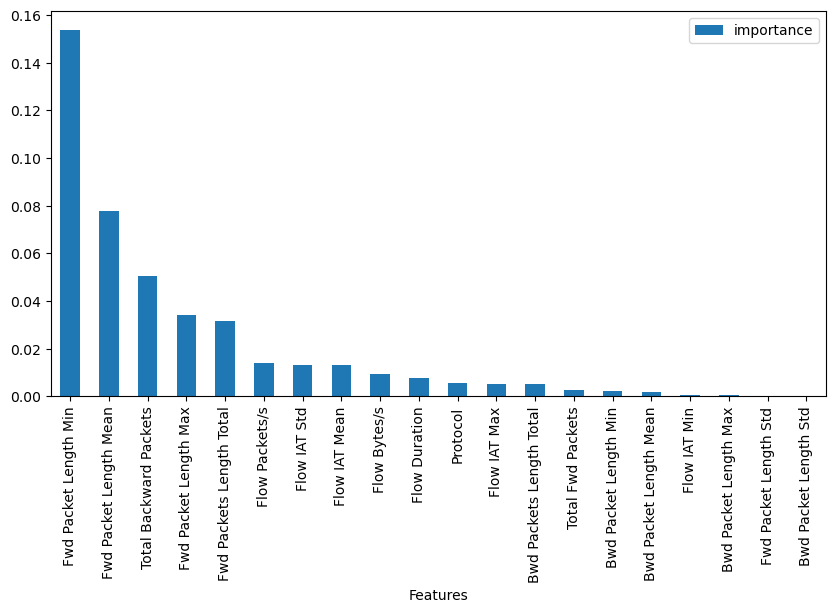

In [31]:
#create bar plot that visualizes the top 20 important features as determined by the Random Forest classifier in descending order
import numpy as np
import sklearn as sk 
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=50, random_state=100,max_depth=15,criterion='entropy')
forest.fit(X_train, y_train)

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
                 axis=0)
indices = np.argsort(importances)[::-1]
refclasscol=list(data.columns.values)
impor_bars = pd.DataFrame({'Features':refclasscol[0:20],'importance':importances[0:20]})


impor_bars = impor_bars.sort_values('importance',ascending=False).set_index('Features')
plt.rcParams['figure.figsize'] = (10, 5)
impor_bars.plot.bar();

# determine an optimal threshold for feature selection.

In [32]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from numpy import sort
from sklearn.feature_selection import SelectFromModel
thresholds = sort(forest.feature_importances_)
for thresh in thresholds:
 # select features using threshold
 selection = SelectFromModel(forest, threshold=thresh, prefit=False)
 select_X_train = selection.fit_transform(X_train,y_train)
 # train model
 selection_model = RandomForestClassifier(n_estimators=50, random_state=200,max_depth=15,criterion='entropy')
 selection_model.fit(select_X_train, y_train)
 # eval model
 select_X_test = selection.transform(X_test)
 predictions = selection_model.predict(select_X_test)
 accuracy = accuracy_score(y_test, predictions)
 print("Thresh=%f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

Thresh=0.000000, n=65, Accuracy: 86.65%
Thresh=0.000000, n=65, Accuracy: 86.65%
Thresh=0.000004, n=63, Accuracy: 84.82%
Thresh=0.000033, n=62, Accuracy: 80.37%
Thresh=0.000036, n=61, Accuracy: 91.91%
Thresh=0.000068, n=60, Accuracy: 86.65%
Thresh=0.000128, n=59, Accuracy: 89.13%
Thresh=0.000129, n=58, Accuracy: 90.23%
Thresh=0.000150, n=57, Accuracy: 87.20%
Thresh=0.000173, n=56, Accuracy: 86.86%
Thresh=0.000200, n=55, Accuracy: 77.01%
Thresh=0.000219, n=54, Accuracy: 88.08%
Thresh=0.000224, n=53, Accuracy: 91.13%
Thresh=0.000242, n=52, Accuracy: 85.82%
Thresh=0.000309, n=51, Accuracy: 78.69%
Thresh=0.000327, n=50, Accuracy: 90.94%
Thresh=0.000720, n=49, Accuracy: 93.31%
Thresh=0.000767, n=48, Accuracy: 86.94%
Thresh=0.001090, n=47, Accuracy: 80.57%
Thresh=0.001579, n=46, Accuracy: 87.85%
Thresh=0.001727, n=45, Accuracy: 93.26%
Thresh=0.001744, n=44, Accuracy: 79.79%
Thresh=0.002158, n=43, Accuracy: 92.15%
Thresh=0.002233, n=42, Accuracy: 89.36%
Thresh=0.002475, n=41, Accuracy: 84.70%


# select features based on a specified threshold.

In [33]:
sele = SelectFromModel(forest, threshold=0.026054, prefit=False)
X_train = sele.fit_transform(X_train,y_train)
X_test = sele.transform(X_test)

# prints the names of the selected features.

In [34]:
filter = sele.get_support(indices=True)
new_features = data.columns[filter]
print(new_features)

Index(['Total Backward Packets', 'Fwd Packets Length Total',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Bwd Header Length', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
       'ACK Flag Count', 'Avg Fwd Segment Size', 'Subflow Fwd Bytes',
       'Init Fwd Win Bytes'],
      dtype='object')


# Random Forrest classifier after featuers selection 

In [35]:
#instantiate the model
RFmodel = RandomForestClassifier(n_estimators=40,random_state=101,max_depth=15,criterion='entropy')
# fit the model
RFmodel = RFmodel.fit(X_train,y_train)
y_predec_RFmodel = RFmodel.predict(X_test)

# Calculate and print the accuracy score
accuracy_RFmodel = accuracy_score(y_test, y_predec_RFmodel )
print("Accuracy score:" ,accuracy_RFmodel )

# Calculate and print the f1 score
RFmodel_f1_score= f1_score(y_test,y_predec_RFmodel , average='weighted')
print("F1 score: ",RFmodel_f1_score)

# Calculate and print the Recall score
RFmodel_recall = recall_score(y_test,y_predec_RFmodel , average='weighted')
print("Recall score:" ,RFmodel_recall)

# Calculate and print the precision score
RFmodel_precision = precision_score(y_test,y_predec_RFmodel , average='weighted')
print("Precision score",RFmodel_precision)

Accuracy score: 0.9937022841776652
F1 score:  0.9937317460313018
Recall score: 0.9937022841776652
Precision score 0.9938651086180048


# logistic regression classifier after features selection 

In [36]:
#instantiate the model
from sklearn.linear_model import LogisticRegression
# fit the model
lg  = LogisticRegression(random_state=101, max_iter=140)
lg.fit(X_train, y_train)
y_prediction_lg = lg.predict(X_test)

# Calculate and print the accuracy score
accuracy_lg = accuracy_score(y_test, y_prediction_lg)
print("Accuracy score: " ,accuracy_lg)

# Calculate and print the f1 score
f1_lg = f1_score(y_test, y_prediction_lg, average='weighted')
print("F1 score: " , f1_lg )
# Calculate and print the Recall score
recall_lg = recall_score(y_test,y_prediction_lg, average='weighted')
print("Recall score:" ,recall_lg)

# Calculate and print the precision score
precision_lg = precision_score(y_test,y_prediction_lg, average='weighted')
print(f"Precision score:" , precision_lg)

Accuracy score:  0.7689395110190709
F1 score:  0.7738662802342458
Recall score: 0.7689395110190709
Precision score: 0.7802487917591369


C:\Users\Discovery\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#  Decision Tree classifier after features selection

In [37]:
#instantiate the model
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
DT=tree.DecisionTreeClassifier(random_state=101,max_depth=21,criterion="gini")
# fit the model
DT.fit(X_train, y_train)
y_prediction_DT = DT.predict(X_test)

# Calculate and print the accuracy score
accuracy_score_DT = accuracy_score(y_test, y_prediction_DT)
print( "Accuracy score: " , accuracy_score_DT)

# Calculate and print the f1 score
f1_score_DT = f1_score(y_test,y_prediction_DT , average='weighted')
print(f"F1 score: " ,f1_score_DT)

# Calculate and print the Recall score
recall_DT = recall_score(y_test, y_prediction_DT, average='weighted')
print("Recall score : " ,recall_DT )

# Calculate and print the precision score
precision_DT = precision_score(y_test,y_prediction_DT, average='weighted')
print("Precision score:",precision_DT)

Accuracy score:  0.9938336475751862
F1 score:  0.9938608898779978
Recall score :  0.9938336475751862
Precision score: 0.9939806931691527


#  GaussianNB after featuers selection

In [38]:
#instantiate the model
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
# fit the model
gnb.fit(X_train, y_train)
y_prediction_gnb = gnb.predict(X_test)

# Calculate and print the accuracy score
accuracy_gnb = accuracy_score(y_test,y_prediction_gnb)
print("Accuracy score: ",accuracy_gnb)

# Calculate and print the f1 score
f1_gnb = f1_score(y_test,y_prediction_gnb , average='weighted')
print("F1 score:",f1_gnb)

# Calculate and print the Recall score
recall_gnb = recall_score(y_test, y_prediction_gnb, average='weighted')
print("Recall score: " ,recall_gnb)

# Calculate and print the precision score
precision_gnb = precision_score(y_test, y_prediction_gnb, average='weighted')
print("Precision score: ",precision_gnb)

Accuracy score:  0.6217352332086669
F1 score: 0.6138291990729172
Recall score:  0.6217352332086669
Precision score:  0.6063893528867589


#  XGBClassifier after features selection

In [39]:
#instantiate the model
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=40,use_label_encoder=False,max_depth=21,booster='gbtree',objective='binary:logistic',eval_metric='logloss',)
# fit the model
xgb.fit(X_train, y_train)
y_prediction_xgb = xgb.predict(X_test)

# Calculate and print the accuracy score
accuracy_score_xgb = accuracy_score(y_test, y_prediction_xgb)
print( "Accuracy score: " , accuracy_score_xgb)

# Calculate and print the f1 score
f1_score_xgb = f1_score(y_test,y_prediction_xgb , average='weighted')
print(f"F1 score: " ,f1_score_xgb)

# Calculate and print the Recall score
recall_xgb = recall_score(y_test, y_prediction_xgb, average='weighted')
print("Recall score : " ,recall_xgb )

# Calculate and print the precision score
precision_xgb = precision_score(y_test,y_prediction_xgb, average='weighted')
print("Precision score:",precision_xgb)


C:\Users\Discovery\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Accuracy score:  0.9935477390041109
F1 score:  0.9935788179164439
Recall score :  0.9935477390041109
Precision score: 0.9937200899813553


# KNeighbors Classifier after fearures selection

In [40]:
#instantiate the model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the model 
knn.fit(X_train, y_train)
y_predec_knn = knn.predict(X_test)

# Calculate and print the accuracy score
accuracy_knn = accuracy_score(y_test, y_predec_knn )
print("Accuracy score:" ,accuracy_knn )

# Calculate and print the f1 score
knn_f1_score = f1_score(y_test,y_predec_knn , average='weighted')
print("F1 score: ",knn_f1_score)

# Calculate and print the Recall score
knn_recall = recall_score(y_test,y_predec_knn , average='weighted')
print("Recall score:" ,knn_recall)

# Calculate and print the precision score
knn_precision = precision_score(y_test,y_predec_knn , average='weighted')
print("Precision score",knn_precision)

Accuracy score: 0.7855376626587952
F1 score:  0.8025428794284906
Recall score: 0.7855376626587952
Precision score 0.8835587648751843


# 6.conclusion :

1.The primary point of view to gain from this project is to experiment with different machine learning models, run exploratory data analysis on the DDoS dataset, and to analyze their features.


2.By making this notebook, I was able to learn a lot about the attributes that models use to determine if the traffic is malicious or benign. I also learned how to change models and how these changes effect how well they function.


3.The overall result from the DDoS dataset is that various features which selected from Random Forest Classifier,such as:
"Fwd Packet Length Min", "Fwd Packet Length Mean", "Total Backwords Packets","Fwd Packet Length Max", "Fwd Packet Length Total", "Flow Packets/s", "Flow IAT std", "Flow IAT Mean", "Flow Bytes/s", "Flow Duration", "Protocol", "Flow IAT Max", "Bwd Packets Length Total", "Total Fwd Packets" have more importance to classify the traffic of malicious or benign.


4.Random Forest Classifier can classify traffic into 99.52% of its relevant classifications, which lowers the likelihood of false traffic.
